# **Visualisation**

## Objectives

* To examine the cleaned dataset for correlations which may support/ disprove our hypotheses
* To produce visualisations which explore relationships, particularly those relating to attrition flag and:
    * Age
    * Education Level
    * Income Level
    * Gender

## Inputs

* The cleaned dataset produced in the Transformation stage
* Use of y-data and visualisations produced in Extraction and Transformation stages to inform next steps
* Any addtional information, from correlations for example, that may help with insights
* The project hypotheses as outlined in README file

## Outputs

* Visualisations using Matplotlib, Seaborn and Plotly which may help explore correlations and relationships

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\mikee\\Desktop\\Hackathon1\\Team1_Hackathon\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\mikee\\Desktop\\Hackathon1\\Team1_Hackathon'

# Section 1

### Exploratory Visualisations

In [4]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
##Import the cleaned dataset 

df = pd.read_csv('Data/Processed/BankChurners_transformed.csv')  
df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Group,Attrition_Flag_Original,Attrition_Flag_Existing Customer
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,...,777,11914.0,1.335,1144.0,42,1.625,0.061,Middle-aged,Existing Customer,1
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,...,864,7392.0,1.541,1291.0,33,3.714,0.105,Middle-aged,Existing Customer,1
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,...,0,3418.0,2.594,1887.0,20,2.333,0.000,Middle-aged,Existing Customer,1
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,...,2517,796.0,1.405,1171.0,20,2.333,0.760,Middle-aged,Existing Customer,1
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,...,0,4716.0,2.175,816.0,28,2.500,0.000,Middle-aged,Existing Customer,1


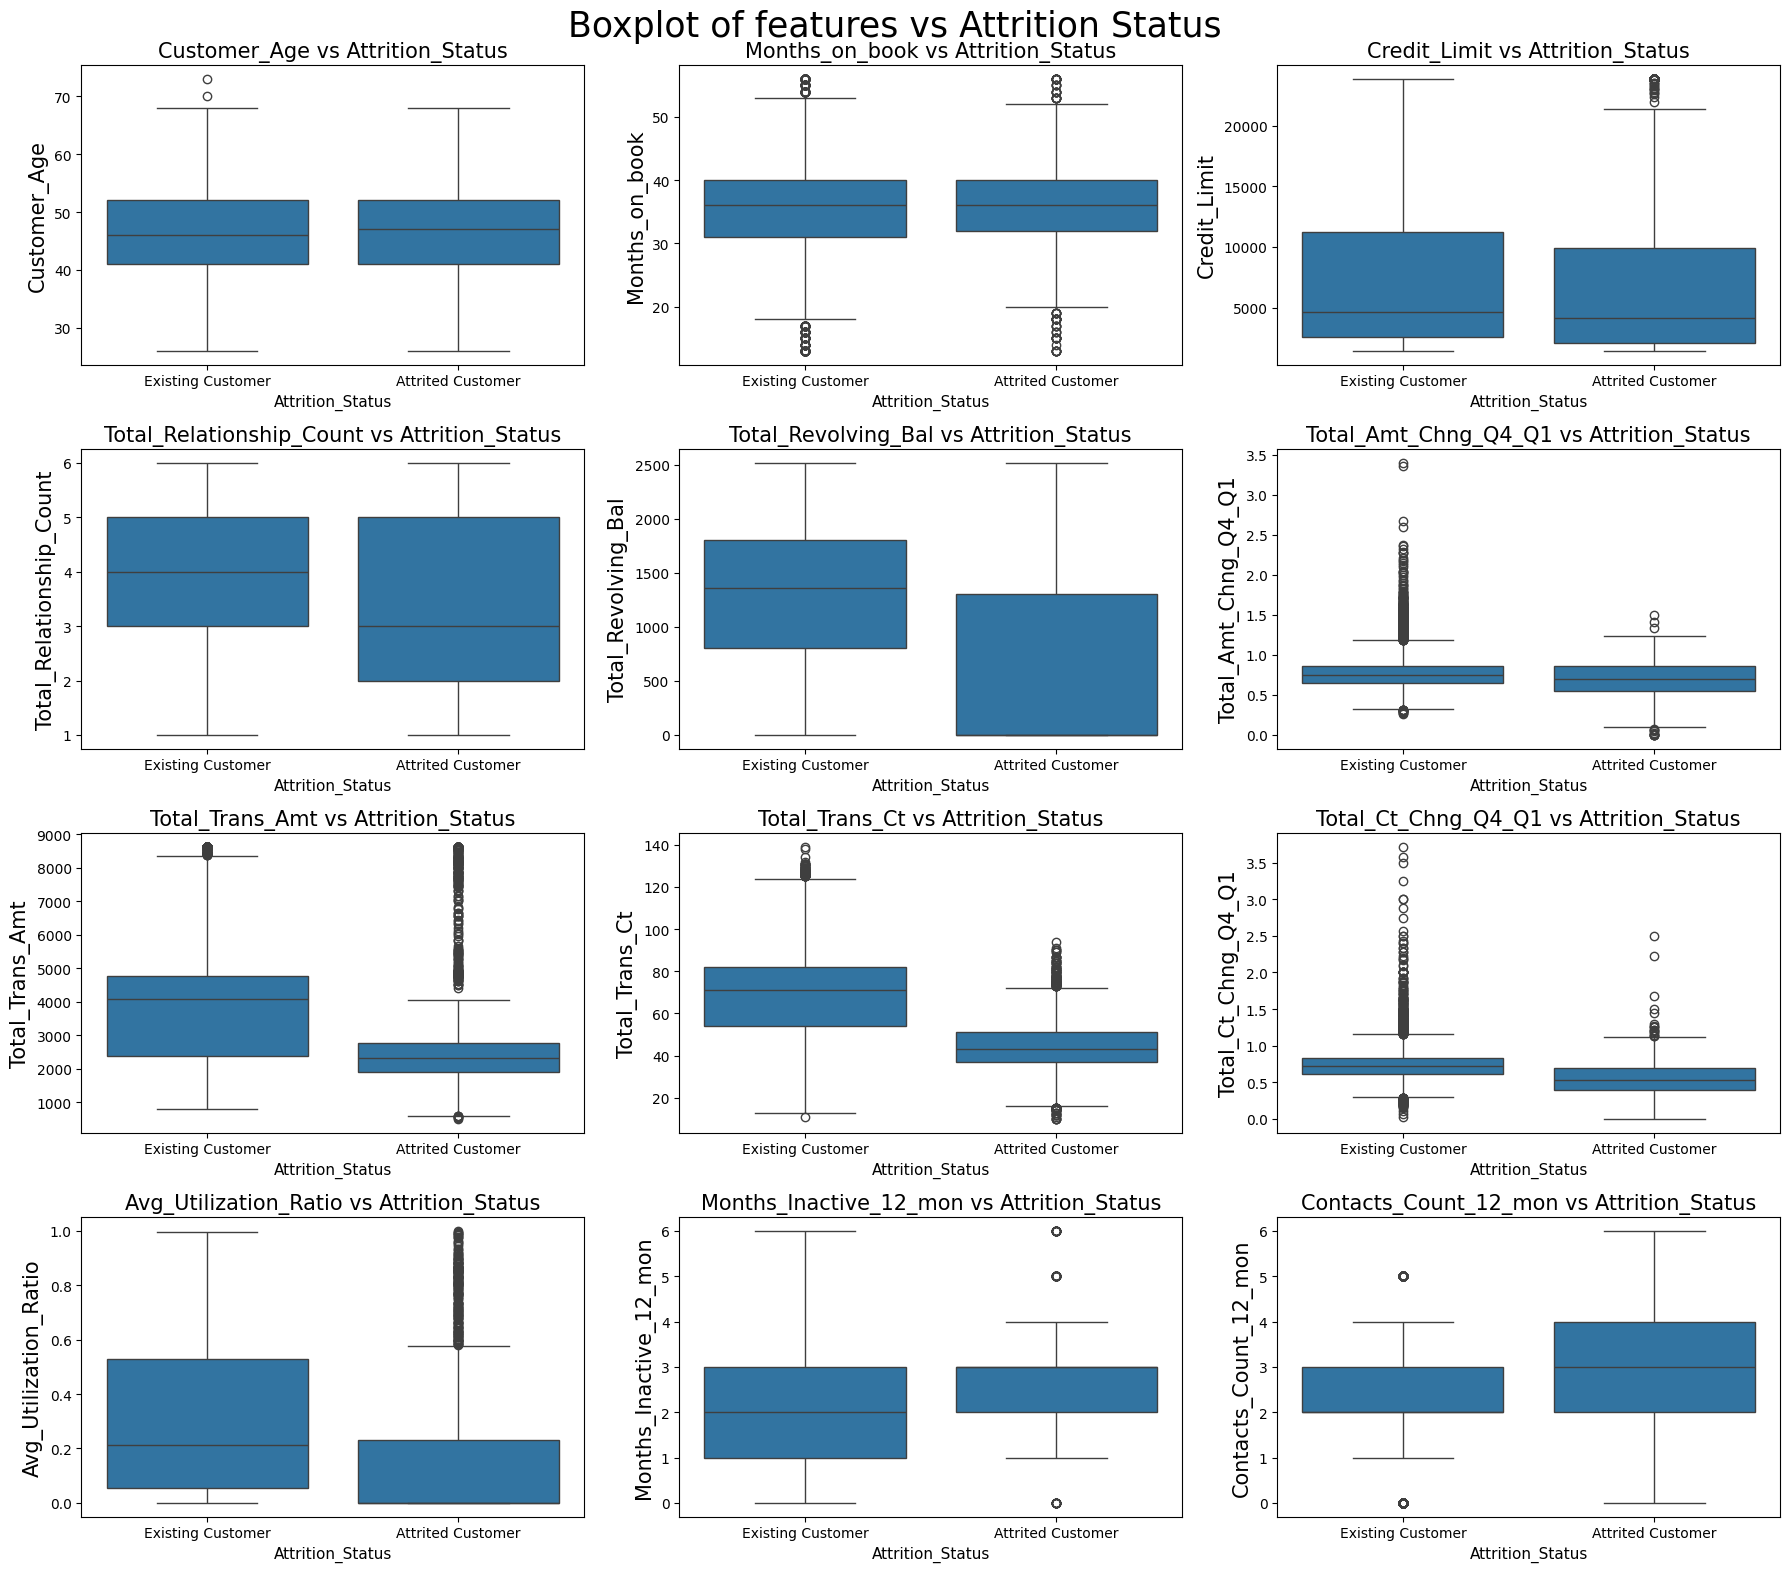

In [6]:
# doing a boxplot of various numeric columns against the Attrition_Flag column to get basic visual insights

# List of numeric columns to plot on y-axis
num_cols = [
    "Customer_Age","Months_on_book","Credit_Limit",
    "Total_Relationship_Count", "Total_Revolving_Bal", "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio", "Months_Inactive_12_mon", "Contacts_Count_12_mon"
]

# num_cols = num_cols = df.select_dtypes(include='number').columns 

# Create subplots (4 rows, 3 cols)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
axes = axes.flatten()  # Flatten 2D array to 1D for easy iteration

# Loop through each column and subplot axis
for i, col in enumerate(num_cols):
    sns.boxplot(x="Attrition_Flag_Original", y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Attrition_Status', fontsize=15)
    axes[i].set_xlabel("Attrition_Status",fontsize=11)
    axes[i].set_ylabel(col, fontsize=15)

plt.suptitle("Boxplot of features vs Attrition Status",size=25)
plt.tight_layout()
plt.show()


* The basic visualisation above shows most of our hypothesis are correct.

* we can see that majority of churned customers had very low average utilization rate, fewer transaction counts, lesser transaction amounts, were mostly inactive and had a high contact count(may be owing to issues/customer disatisfaction)

* could not conclude much from the age,credit_limit,months_on_book plots as the distributions look almost similar for churned and non-churned customers. Will investigate further in the visualisations below.


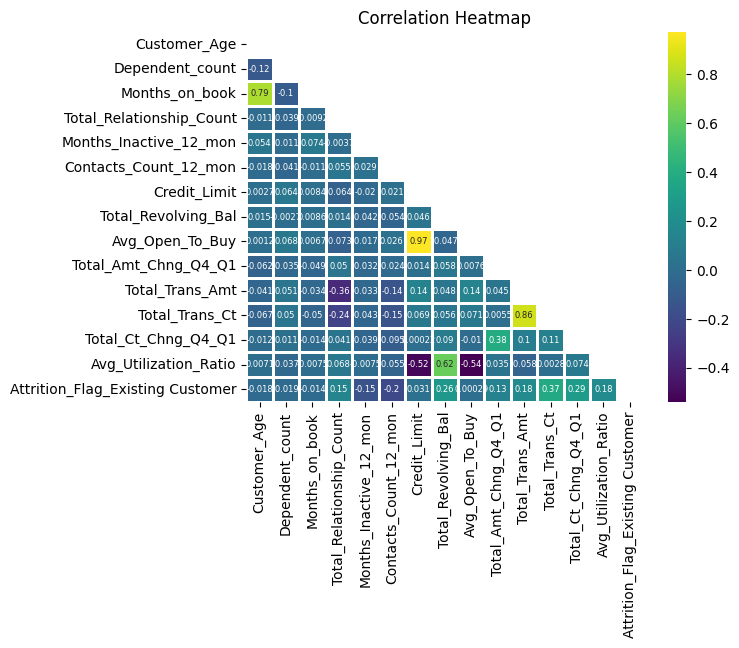

In [7]:
# correlation heatmap to see how the numerical columns are correlated to each other

df_corr = df.select_dtypes(include='number').corr(method='pearson')
#print(df_corr)

mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_corr,annot=True,mask=mask,cmap='viridis',annot_kws={"size":6 },linewidths=0.8)
plt.ylim(df_corr.shape[1],0);
plt.title('Correlation Heatmap')
plt.show()

* could not really see strong correlation b/w churn and the various other features from the heatmap above.
* Will explore further with other visualisations below.

### Comparison with Hypotheses ###
Next we will look at any correlations between the categories associated with age, education and income level using visualisations to see any correlations
First we will look at the categorical values we are interested in.

In [36]:
#Income Category by AttritionStatus by percentage in each classification
income_group_counts = df["Income_Category"].groupby(df["Attrition_Flag_Existing Customer"]).value_counts().unstack()
income_group_percentage = income_group_counts.div(income_group_counts.sum(axis=1), axis=0) * 100
income_group_percentage


Income_Category,Less than $40K,$40K - $60K,$60K - $80K,$80K - $120K,$120K +
Attrition_Flag_Existing Customer,,,,,
0,42.500000,18.819444,13.125000,16.805556,8.750000
1,38.930693,20.052805,16.013201,17.069307,7.933993


Text(0.5, 0, 'Income Category')

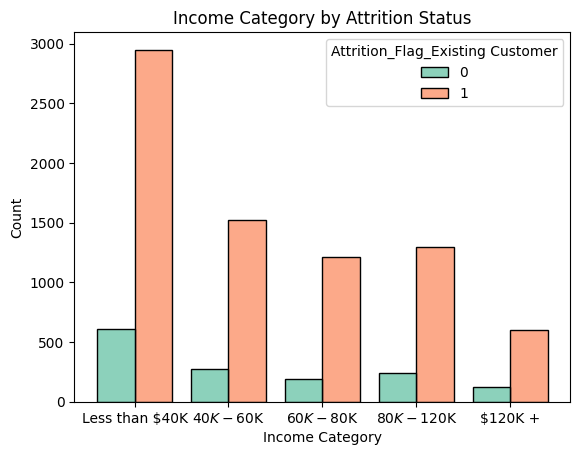

In [ ]:
#IncomeCategory by AttritionStatus 

sns.histplot(data=df, x="Income_Category", hue="Attrition_Flag_Existing Customer", multiple="dodge", shrink=.8  , palette="Set2")
plt.title("Income Category by Attrition Status")
plt.xlabel("Income Category")

This shows a very small variation of attrition among low and very high earners - with those categories showing a slightly higher percentage of attrited customers relative to the size of the grouping

In [ ]:
#Age Category by AttritionStatus  as percentage of each group

age_group_counts = df["Age_Group"].groupby(df["Attrition_Flag_Existing Customer"]).value_counts().unstack()
age_group_percentage = age_group_counts.div(age_group_counts.sum(axis=1), axis=0) * 100
age_group_percentage

Age_Group,Middle-aged,Older,Young
Attrition_Flag_Existing Customer,,,
0,79.532883,12.968654,7.498463
1,77.447059,13.176471,9.376471


Text(0.5, 0, 'Age Group')

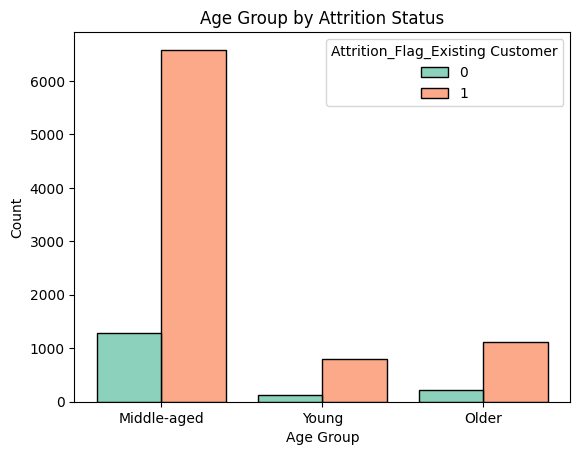

In [40]:
#Age_Group by AttritionStatus 

sns.histplot(data=df, x="Age_Group", hue="Attrition_Flag_Existing Customer", multiple="dodge", shrink=.8  , palette="Set2")
plt.title("Age Group by Attrition Status")
plt.xlabel("Age Group")

Comparison of age groups shows that middle aged customers are slightly more likely to attrit than older or younger customers.

In [41]:
#Education Category by AttritionStatus  as percentage of each group

education_group_counts = df["Education_Level"].groupby(df["Attrition_Flag_Existing Customer"]).value_counts().unstack()
education_group_percentage = education_group_counts.div(education_group_counts.sum(axis=1), axis=0) * 100
education_group_percentage

Education_Level,Uneducated,High School,College,Graduate,Post-Graduate,Doctorate
Attrition_Flag_Existing Customer,,,,,,
0,17.286652,22.319475,11.232677,35.521517,6.710430,6.929249
1,17.272350,23.587122,11.869559,36.493022,5.858781,4.919165


Text(0.5, 0, 'Education Level')

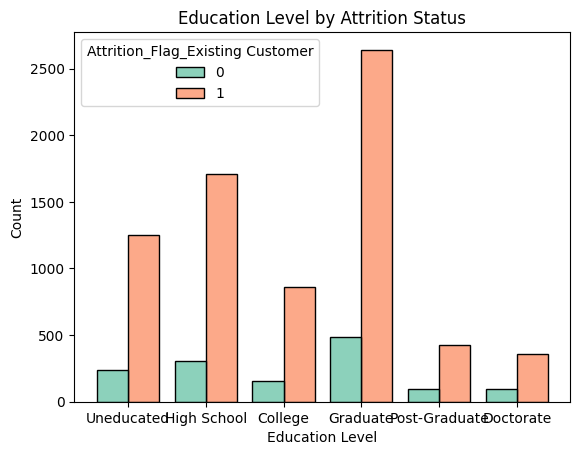

In [42]:
#Education Category by AttritionStatus 

sns.histplot(data=df, x="Education_Level", hue="Attrition_Flag_Existing Customer", multiple="dodge", shrink=.8  , palette="Set2")
plt.title("Education Level by Attrition Status")
plt.xlabel("Education Level")

Again there are very slight variations, with customers with the highest education levels slightly more likely to attrit as a proportion of those groups.
Comparing with our hypotheses there are only small variations in attrition between classifications in each group.

---

# Analysis of numerical Categories and churn rate

#### Visual Analysis of numeric Categories

Having analysed the data in categorical columns of interest this section will investigate correlations between Attrition and numeric values of interest:
 * Card Utilisation  - Avg_Utilization_Ratio
 * Transaction levels  - Total_Amt_Chng_Q4_Q1
 * Activity level  -  Months_Inactive_12_mon



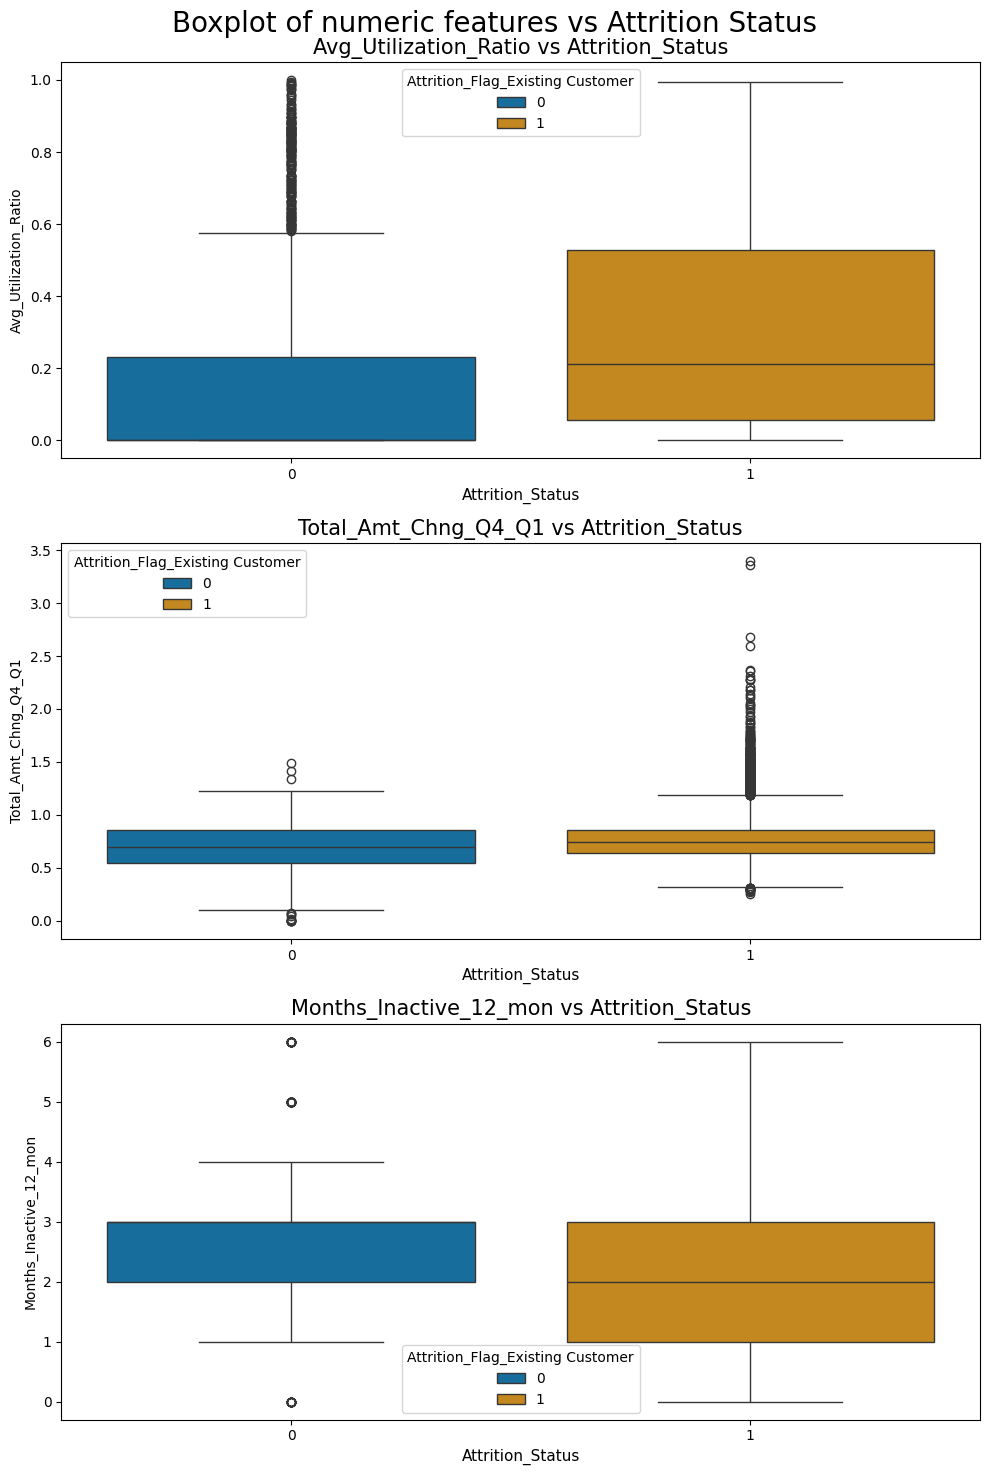

In [45]:
##plots of Avg_Utilization_Ratio, Total_Amt_Chng_Q4_Q1, Months_Inactive_12_mon against Attrition_Flag_Existing Customer
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
sns.boxplot(x="Attrition_Flag_Existing Customer", y="Avg_Utilization_Ratio", data=df, ax=axes[0],hue="Attrition_Flag_Existing Customer", palette="colorblind")
axes[0].set_title('Avg_Utilization_Ratio vs Attrition_Status', fontsize=15)
axes[0].set_xlabel("Attrition_Status",fontsize=11)  
sns.boxplot(x="Attrition_Flag_Existing Customer", y="Total_Amt_Chng_Q4_Q1", data=df, ax=axes[1], hue="Attrition_Flag_Existing Customer", palette="colorblind")
axes[1].set_title('Total_Amt_Chng_Q4_Q1 vs Attrition_Status', fontsize=15)
axes[1].set_xlabel("Attrition_Status",fontsize=11)      
sns.boxplot(x="Attrition_Flag_Existing Customer", y="Months_Inactive_12_mon", data=df, ax=axes[2], hue="Attrition_Flag_Existing Customer", palette="colorblind")
axes[2].set_title('Months_Inactive_12_mon vs Attrition_Status', fontsize=15)
axes[2].set_xlabel("Attrition_Status",fontsize=11)
plt.suptitle("Boxplot of numeric features vs Attrition Status",size=20)
plt.tight_layout()
plt.show()

Analysis of this suggests the strongest correlation between card utilisation and likelihood for attrition, with a much smaller correlation, but still evident difference for transaction levels and a strong correlation between attrition and accounts inactive for 2-3 months. 
The next step will be to examine any correlations between these categories and likelihood of attrition.

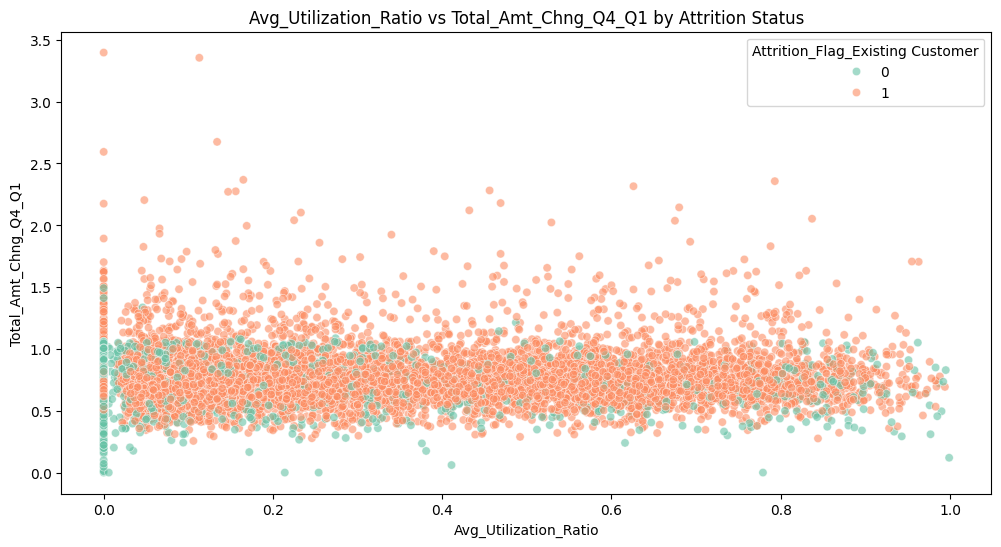

In [60]:
##seaborn histplot showing Avg_Utilization_Ratio against Total_Amt_Chng_Q4_Q1 colored by Attrition_Flag_Existing Customer
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
sns.scatterplot(data=df, x="Avg_Utilization_Ratio", y="Total_Amt_Chng_Q4_Q1", hue="Attrition_Flag_Existing Customer", palette="Set2", alpha=0.6)
plt.title("Avg_Utilization_Ratio vs Total_Amt_Chng_Q4_Q1 by Attrition Status")
plt.xlabel("Avg_Utilization_Ratio")
plt.ylabel("Total_Amt_Chng_Q4_Q1")  
plt.show()

This shows us that there is a strong connection between low credit utilisation, low transaction activity and attrition - though from the distribution of attrited customers there are clearly other factors. 
Now we will examine inactivity agaisnt these other factors.

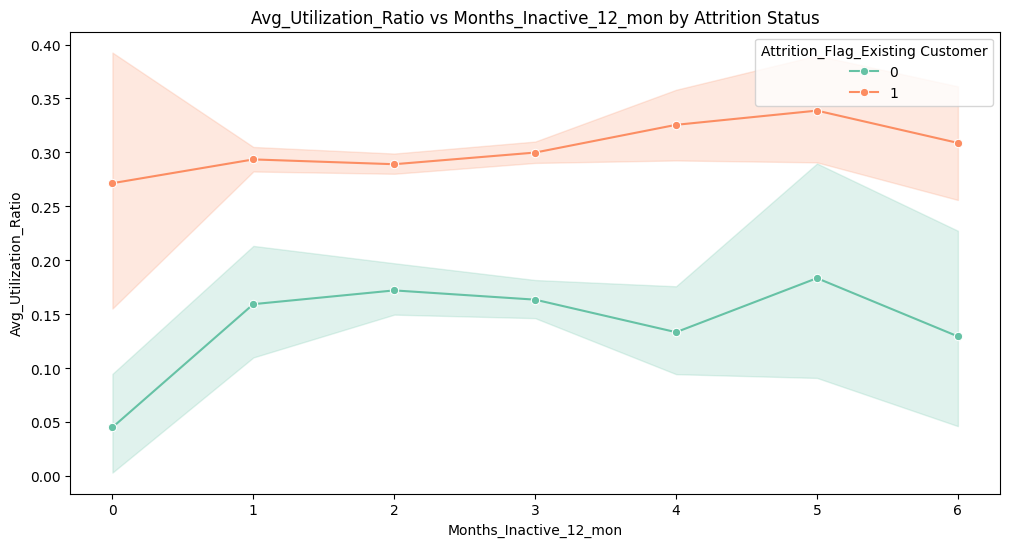

In [ ]:
#line plot with months_inactive as x-axis and Avg_Utilization_Ratio coloured by Attrition_Flag_Existing Customer


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
sns.lineplot(data=df, x="Months_Inactive_12_mon", y="Avg_Utilization_Ratio", hue="Attrition_Flag_Existing Customer", palette="Set2", marker="o")
plt.title("Avg_Utilization_Ratio vs Months_Inactive_12_mon by Attrition Status")
plt.xlabel("Months_Inactive_12_mon")         
plt.show()



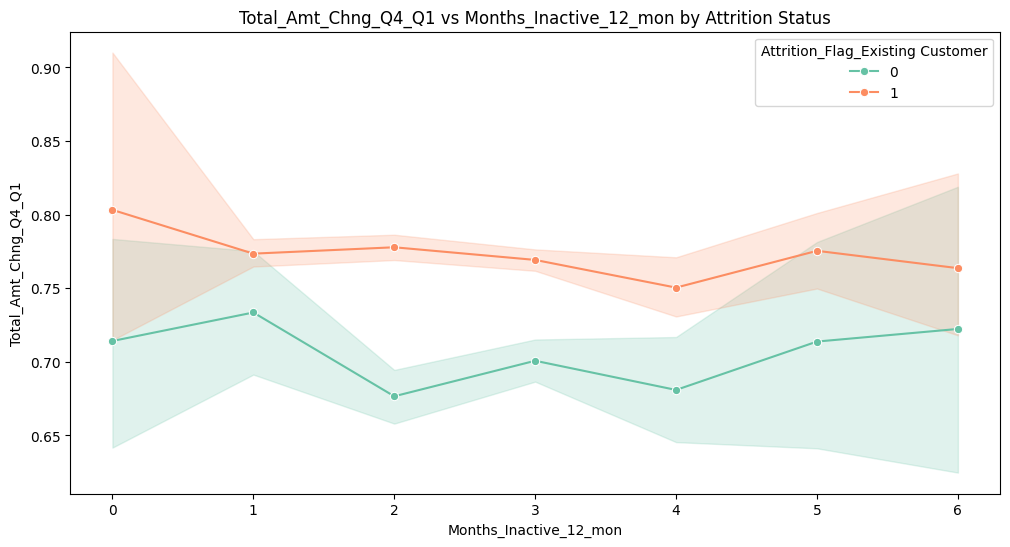

In [80]:
#line plot with months_inactive as x-axis and Total_Amt_Chng_Q4_Q1 coloured by Attrition_Flag_Existing Customer



fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
sns.lineplot(data=df, x="Months_Inactive_12_mon", y="Total_Amt_Chng_Q4_Q1", hue="Attrition_Flag_Existing Customer", palette="Set2", marker="o")
plt.title("Total_Amt_Chng_Q4_Q1 vs Months_Inactive_12_mon by Attrition Status")
plt.xlabel("Months_Inactive_12_mon")         
plt.show()

From these charts we can see low utilisation and low changes in amount lead to a greater likelihood to lead to attrition and inactivity between months 1 - 5 with low utilisation showing the greatest spikes in attrition.

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
# import os
# try:
#   # create your folder here
#   # os.makedirs(name='')
# except Exception as e:
#   print(e)
